# Volatility Proof — Plots & Tables

In [7]:
import pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
df = pd.read_csv('C:/Users/Carpe/OneDrive/Desktop/GPT_EXPONA_SIM/expona_volatility_proof/out/volatility_grid.csv')
df.head()

,vol_annualized,kurtosis,mean_tau,p95_tau,avg_r,mechanism,delta,L,seed
0,0.001261,2.650224,0.0,0.0,1.005330,off,15,10.0,1
1,0.001257,2.419269,0.0,0.0,0.996460,off,15,10.0,2
2,0.001284,5.896304,0.0,0.0,0.999975,off,15,10.0,3
3,0.001247,2.702546,0.0,0.0,0.999483,off,15,10.0,4
4,0.001267,4.615056,0.0,0.0,0.998810,off,15,10.0,5


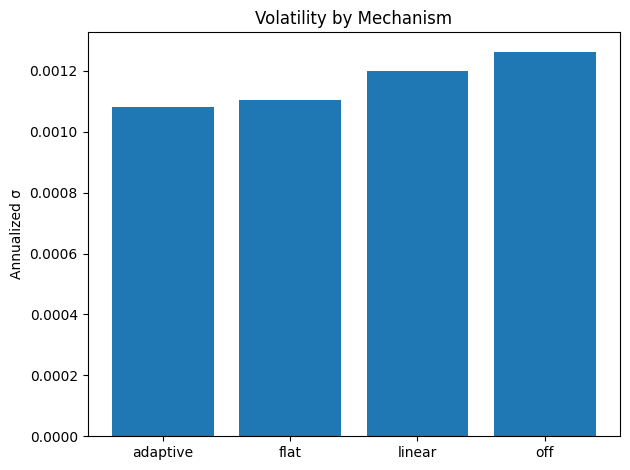

In [8]:
g = df.groupby('mechanism')['vol_annualized'].mean().reset_index()
plt.figure(); plt.bar(g['mechanism'], g['vol_annualized']); plt.ylabel('Annualized σ'); plt.title('Volatility by Mechanism'); Path('out/plots').mkdir(parents=True, exist_ok=True); plt.tight_layout(); plt.savefig('out/plots/vol_by_mechanism.png', dpi=150); plt.show()

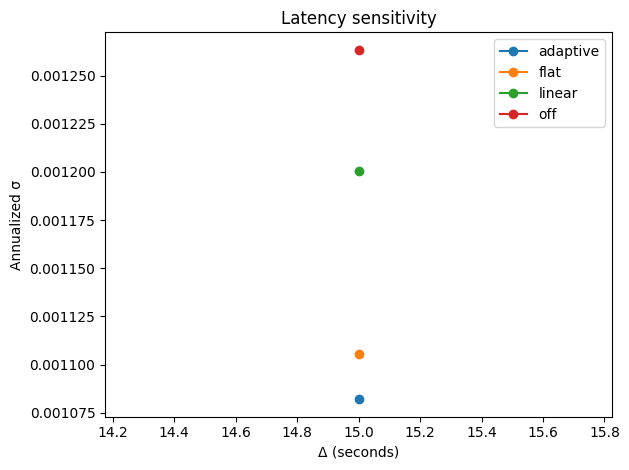

In [9]:
g = df.groupby(['mechanism','delta'])['vol_annualized'].mean().reset_index()
for mech in g['mechanism'].unique():
    s = g[g['mechanism']==mech]
    plt.plot(s['delta'], s['vol_annualized'], marker='o', label=mech)
plt.xlabel('Δ (seconds)'); plt.ylabel('Annualized σ'); plt.title('Latency sensitivity');
plt.legend(); plt.tight_layout(); plt.savefig('out/plots/latency_sensitivity.png', dpi=150); plt.show()